✅ Dataset Loaded Successfully!
Shape of dataset: (1025, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.268437,0.661504,-0.915755,-0.377636,-0.659332,-0.418878,0.891255,0.821321,-0.712287,-0.060888,0.995433,1.209221,1.089852,-1.026698
1,-0.158157,0.661504,-0.915755,0.479107,-0.833861,2.387330,-1.004049,0.255968,1.403928,1.727137,-2.243675,-0.731971,1.089852,-1.026698
2,1.716595,0.661504,-0.915755,0.764688,-1.396233,-0.418878,0.891255,-1.048692,1.403928,1.301417,-2.243675,-0.731971,1.089852,-1.026698
3,0.724079,0.661504,-0.915755,0.936037,-0.833861,-0.418878,0.891255,0.516900,-0.712287,-0.912329,0.995433,0.238625,1.089852,-1.026698
4,0.834359,-1.511706,-0.915755,0.364875,0.930822,2.387330,0.891255,-1.874977,-0.712287,0.705408,-0.624121,2.179817,-0.522122,-1.026698


Feature matrix shape: (1025, 13)
Target vector shape: (1025,)

✅ Features scaled successfully!


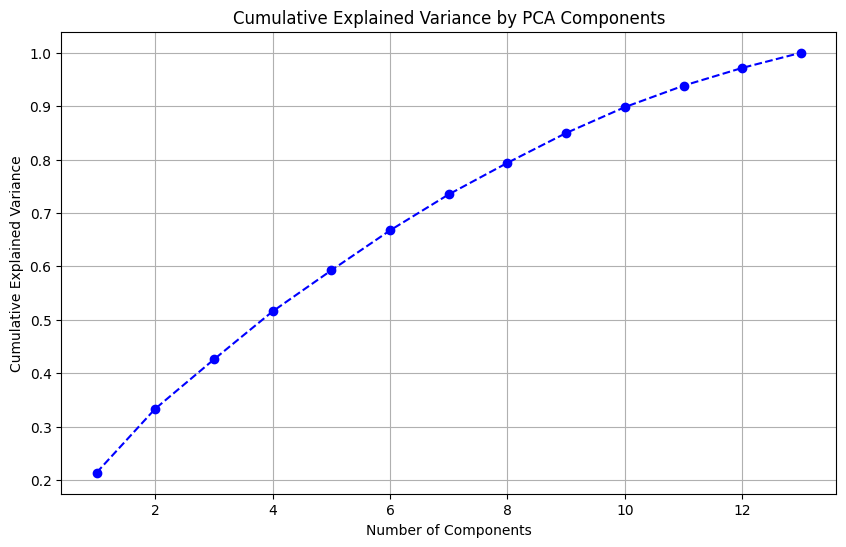


Explained Variance Ratio per Component:
PC1: 0.2137
PC2: 0.1197
PC3: 0.0924
PC4: 0.0899
PC5: 0.0769
PC6: 0.0748
PC7: 0.0674
PC8: 0.0591
PC9: 0.0558
PC10: 0.0485
PC11: 0.0402
PC12: 0.0332
PC13: 0.0284

✅ Optimal number of components = 12
Shape of PCA-transformed dataset: (1025, 12)


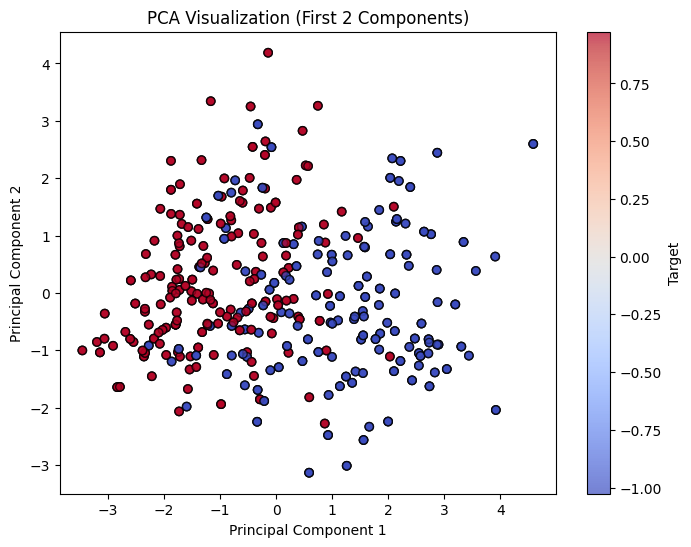


✅ PCA-transformed dataset saved as 'data/heart_pca.csv'


In [2]:

# STEP 1: IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# STEP 2: LOAD CLEANED DATASET
df = pd.read_csv("heart_cleaned.csv")
print("✅ Dataset Loaded Successfully!")
print("Shape of dataset:", df.shape)
display(df.head())

# STEP 3: SEPARATE FEATURES & TARGET
# Adjust 'target' if your dataset uses a different column name
if 'target' in df.columns:
    X = df.drop("target", axis=1)
    y = df["target"]
else:
    # If the target column has another name, replace it here
    X = df.iloc[:, :-1]
    y = df.iloc[:, -1]

print("Feature matrix shape:", X.shape)
print("Target vector shape:", y.shape)

# =====================================
# STEP 4: SCALE THE FEATURES
# =====================================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("\n✅ Features scaled successfully!")

# =====================================
# STEP 5: APPLY PCA
# =====================================
# Initialize PCA without specifying components to analyze all
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# =====================================
# STEP 6: EXPLAINED VARIANCE RATIO
# =====================================
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative variance to decide optimal components
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid()
plt.show()

# Print explained variance for each component
print("\nExplained Variance Ratio per Component:")
for i, var in enumerate(explained_variance, start=1):
    print(f"PC{i}: {var:.4f}")

# =====================================
# STEP 7: SELECT OPTIMAL COMPONENTS
# =====================================
# Keep components that explain at least 95% of variance
optimal_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"\n✅ Optimal number of components = {optimal_components}")

# Re-run PCA with optimal components only
pca_final = PCA(n_components=optimal_components)
X_pca_final = pca_final.fit_transform(X_scaled)

print("Shape of PCA-transformed dataset:", X_pca_final.shape)


# STEP 8: VISUALIZE FIRST 2 PCA COMPONENTS
# =====================================
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_final[:, 0], X_pca_final[:, 1], c=y, cmap='coolwarm', edgecolor='k', alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Visualization (First 2 Components)")
plt.colorbar(label="Target")
plt.show()


# STEP 9: SAVE PCA-TRANSFORMED DATASET
# =====================================
pca_df = pd.DataFrame(X_pca_final, columns=[f"PC{i+1}" for i in range(optimal_components)])
pca_df["target"] = y.values
pca_df.to_csv("heart_pca.csv", index=False)
print("\n✅ PCA-transformed dataset saved as 'heart_pca.csv'")
